<a href="https://colab.research.google.com/github/ed765super/DATA602/blob/main/Data602_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initial import of the data

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

yugiohCards = pd.read_csv('YGO_Cards_v2.csv', sep=',', encoding='latin-1')
yugiohCards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5949 non-null   object 
 1   attack              5949 non-null   object 
 2   attribute           5949 non-null   object 
 3   defense             5842 non-null   object 
 4   has_materials       5949 non-null   bool   
 5   has_name_condition  5949 non-null   bool   
 6   is_extra_deck       5949 non-null   bool   
 7   is_fusion           5949 non-null   bool   
 8   is_link             5949 non-null   bool   
 9   is_pendulum         5949 non-null   bool   
 10  is_synchro          5949 non-null   bool   
 11  is_xyz              5949 non-null   bool   
 12  link_markers        107 non-null    object 
 13  link_number         107 non-null    float64
 14  materials           1030 non-null   object 
 15  monster_types       5949 non-null   object 
 16  name_c

In [84]:
yugiohCards = yugiohCards.rename(columns={"Unnamed: 0": "name"})
yugiohCards

,name,attack,attribute,defense,has_materials,has_name_condition,is_extra_deck,is_fusion,is_link,is_pendulum,is_synchro,is_xyz,link_markers,link_number,materials,monster_types,name_condition,number,pendulum_left,pendulum_right,pendulum_text,releases,Type,stars,text
0,3-Hump Lacooda,500,EARTH,1500,False,False,False,False,False,False,False,False,NaN,NaN,NaN,['Effect'],NaN,86988864,NaN,NaN,NaN,"{'OCG': {""Pharaoh's Inheritance"": {'Japanese':...",Beast,3.0,"If there are 3 face-up ""3-Hump Lacooda"" cards ..."
1,"30,000-Year White Turtle",1250,WATER,2100,False,False,False,False,False,False,False,False,NaN,NaN,NaN,['Normal'],NaN,11714098,NaN,NaN,NaN,{'OCG': {'Booster 5': {'Japanese': {'set_numbe...,Aqua,5.0,A huge turtle that has existed for more than 3...
2,4-Starred Ladybug of Doom,800,WIND,1200,False,False,False,False,False,False,False,False,NaN,NaN,NaN,"['Flip', 'Effect']",NaN,83994646,NaN,NaN,NaN,{'OCG': {'Thousand Eyes Bible': {'Japanese': {...,Insect,3.0,FLIP: Destroy all Level 4 monsters your oppone...
3,7 Colored Fish,1800,WATER,800,False,False,False,False,False,False,False,False,NaN,NaN,NaN,['Normal'],NaN,23771716,NaN,NaN,NaN,{'OCG': {'Vol.7': {'Japanese': {'set_number': ...,Fish,4.0,A rare rainbow fish that has never been caught...
4,8-Claws Scorpion,300,DARK,200,False,False,False,False,False,False,False,False,NaN,NaN,NaN,['Effect'],NaN,14261867,NaN,NaN,NaN,{'OCG': {'Duelist Legacy Volume.5': {'Japanese...,Insect,2.0,"Once per turn, you can flip this card into fac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,ZW - Phoenix Bow,1100,FIRE,0,False,False,False,False,False,False,False,False,NaN,NaN,NaN,['Effect'],NaN,87008374,NaN,NaN,NaN,{'OCG': {'Return of the Duelist': {'Japanese':...,Winged Beast,3.0,"You can target 1 face-up ""Number C39: Utopia R..."
5945,ZW - Sleipnir Mail,1000,LIGHT,1000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,['Effect'],NaN,02648201,NaN,NaN,NaN,"{'OCG': {'Weekly Sh?nen Jump 2013, Issue 36 pr...",Beast,4.0,"You can target 1 ""Utopia"" monster you control;..."
5946,ZW - Tornado Bringer,1300,WIND,1800,False,False,False,False,False,False,False,False,NaN,NaN,NaN,['Effect'],NaN,81471108,NaN,NaN,NaN,{'TCG': {'Cosmo Blazer': {'French': {'set_numb...,Dragon,5.0,"You can target 1 ""Utopia"" monster you control;..."
5947,ZW - Ultimate Shield,0,EARTH,2000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,['Effect'],NaN,18865703,NaN,NaN,NaN,{'TCG': {'Cosmo Blazer': {'French': {'set_numb...,Aqua,4.0,When this card is Normal or Special Summoned: ...


In [85]:
#Convert the Datatypes
#Note: since attack and defense can be question marks, X000, or ---, they get 
#converted to strings when "convert_dtypes" gets called. To combat this I will 
#be doing what "Dueling Nexus", a yugiohcard simulator, does in their implementation
#of the site and use -2, -3, and -4 respectively. 

#similarly "number" has "None" as some of the passcodes 
#so I will be doing the same process and converting all the Nones to -1.
yugiohCards['attack'].replace('?','-2',inplace=True)
yugiohCards['attack'].replace('X000','-3',inplace=True)
yugiohCards['attack'].replace('---','-4',inplace=True)
yugiohCards['defense'].replace('?','-2',inplace=True)
yugiohCards['defense'].replace('X000','-3',inplace=True)
yugiohCards['defense'].replace('---','-4',inplace=True)
yugiohCards['number'].replace('None','-1',inplace=True)

yugiohCards['attack'] = pd.to_numeric(yugiohCards['attack'])
yugiohCards['defense'] = pd.to_numeric(yugiohCards['defense'])
yugiohCards['number'] = pd.to_numeric(yugiohCards['number'])

dfConverted = yugiohCards.convert_dtypes()

print(dfConverted.dtypes)
dfConverted

name                   string
attack                  Int64
attribute              string
defense                 Int64
has_materials         boolean
has_name_condition    boolean
is_extra_deck         boolean
is_fusion             boolean
is_link               boolean
is_pendulum           boolean
is_synchro            boolean
is_xyz                boolean
link_markers           string
link_number             Int64
materials              string
monster_types          string
name_condition         string
number                  Int64
pendulum_left           Int64
pendulum_right          Int64
pendulum_text          string
releases               string
Type                   string
stars                   Int64
text                   string
dtype: object


,name,attack,attribute,defense,has_materials,has_name_condition,is_extra_deck,is_fusion,is_link,is_pendulum,is_synchro,is_xyz,link_markers,link_number,materials,monster_types,name_condition,number,pendulum_left,pendulum_right,pendulum_text,releases,Type,stars,text
0,3-Hump Lacooda,500,EARTH,1500,False,False,False,False,False,False,False,False,<NA>,<NA>,<NA>,['Effect'],<NA>,86988864,<NA>,<NA>,<NA>,"{'OCG': {""Pharaoh's Inheritance"": {'Japanese':...",Beast,3,"If there are 3 face-up ""3-Hump Lacooda"" cards ..."
1,"30,000-Year White Turtle",1250,WATER,2100,False,False,False,False,False,False,False,False,<NA>,<NA>,<NA>,['Normal'],<NA>,11714098,<NA>,<NA>,<NA>,{'OCG': {'Booster 5': {'Japanese': {'set_numbe...,Aqua,5,A huge turtle that has existed for more than 3...
2,4-Starred Ladybug of Doom,800,WIND,1200,False,False,False,False,False,False,False,False,<NA>,<NA>,<NA>,"['Flip', 'Effect']",<NA>,83994646,<NA>,<NA>,<NA>,{'OCG': {'Thousand Eyes Bible': {'Japanese': {...,Insect,3,FLIP: Destroy all Level 4 monsters your oppone...
3,7 Colored Fish,1800,WATER,800,False,False,False,False,False,False,False,False,<NA>,<NA>,<NA>,['Normal'],<NA>,23771716,<NA>,<NA>,<NA>,{'OCG': {'Vol.7': {'Japanese': {'set_number': ...,Fish,4,A rare rainbow fish that has never been caught...
4,8-Claws Scorpion,300,DARK,200,False,False,False,False,False,False,False,False,<NA>,<NA>,<NA>,['Effect'],<NA>,14261867,<NA>,<NA>,<NA>,{'OCG': {'Duelist Legacy Volume.5': {'Japanese...,Insect,2,"Once per turn, you can flip this card into fac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,ZW - Phoenix Bow,1100,FIRE,0,False,False,False,False,False,False,False,False,<NA>,<NA>,<NA>,['Effect'],<NA>,87008374,<NA>,<NA>,<NA>,{'OCG': {'Return of the Duelist': {'Japanese':...,Winged Beast,3,"You can target 1 face-up ""Number C39: Utopia R..."
5945,ZW - Sleipnir Mail,1000,LIGHT,1000,False,False,False,False,False,False,False,False,<NA>,<NA>,<NA>,['Effect'],<NA>,2648201,<NA>,<NA>,<NA>,"{'OCG': {'Weekly Sh?nen Jump 2013, Issue 36 pr...",Beast,4,"You can target 1 ""Utopia"" monster you control;..."
5946,ZW - Tornado Bringer,1300,WIND,1800,False,False,False,False,False,False,False,False,<NA>,<NA>,<NA>,['Effect'],<NA>,81471108,<NA>,<NA>,<NA>,{'TCG': {'Cosmo Blazer': {'French': {'set_numb...,Dragon,5,"You can target 1 ""Utopia"" monster you control;..."
5947,ZW - Ultimate Shield,0,EARTH,2000,False,False,False,False,False,False,False,False,<NA>,<NA>,<NA>,['Effect'],<NA>,18865703,<NA>,<NA>,<NA>,{'TCG': {'Cosmo Blazer': {'French': {'set_numb...,Aqua,4,When this card is Normal or Special Summoned: ...


## Timespan of the data

In [86]:
#What's the timespan of the data? (What is the most recent and earliest year)
#extract the year
listOfTCGDates = []
currRow = 0
for x in dfConverted['releases']:
  startOfTCG = dfConverted['releases'][currRow].find('TCG')
  if (currRow == 1455):
    #hardcoded because that day the EU and the Oceanic releases was scaraped as 
    #different despite it being considered the same thing. I assume this is the 
    #first time OC dropped their packs half a second early 
    #(they tend to do that, but konami has since wised up and gives OC no power)
    listOfTCGDates.append('2010') 
  if ((startOfTCG != -1) & (currRow != 1455)):
    startOfTCGEnglish = dfConverted['releases'][currRow][startOfTCG:].find('English')
    startofTCGNADate = dfConverted['releases'][currRow][startOfTCG + startOfTCGEnglish:].find('date')
    TCGDate = dfConverted['releases'][currRow][startOfTCG + startOfTCGEnglish  + startofTCGNADate + 8: startOfTCG + startOfTCGEnglish  + startofTCGNADate + 12]
    listOfTCGDates.append(TCGDate)
  else:
    #Its an OCG card only and has no TCG release. Since yugioh never existed in the 1900s, that year will indicate its an OCG card
    listOfTCGDates.append('1900')
  currRow = currRow + 1

In [87]:
del listOfTCGDates[-1] #its a for loop and it added an extra year

In [88]:
#add the list into the dataframe
dfConverted['TCG_Dates'] = listOfTCGDates
dfConverted['TCG_Dates'] = pd.to_numeric(dfConverted['TCG_Dates'])

#Note: had to get 2nd smallest as I made 1900 as the "invalid" number
print ("Earliest year found: ", dfConverted['TCG_Dates'].drop_duplicates().nsmallest(2).iloc[-1])
print ("Latest year found: ", dfConverted['TCG_Dates'].drop_duplicates().nlargest())

Earliest year found:  2001
Latest year found:  113    2018
18     2017
7      2016
15     2015
43     2014
Name: TCG_Dates, dtype: int64


Interesting Thing to Note:


*   This dataset contains cards printed from 2001 to 2018



# Fix Broken Data

In [89]:
#The following are all monsters with non numerical attacks/def
print(dfConverted.loc[dfConverted['attack'] == -2])
print(dfConverted.loc[dfConverted['attack'] == -3])
print(dfConverted.loc[dfConverted['attack'] == -4])

print(dfConverted.loc[dfConverted['defense'] == -2])
print(dfConverted.loc[dfConverted['defense'] == -3])
print(dfConverted.loc[dfConverted['defense'] == -4])

                                        name  ...  TCG_Dates
42                   Aegaion the Sea Castrum  ...       2016
318                     Ascension Sky Dragon  ...       2014
519   Blackwing - Aurora the Northern Lights  ...       2010
798                   Chimeratech Overdragon  ...       2006
844                        Clear Vice Dragon  ...       2009
...                                      ...  ...        ...
5923                       Zoodiac Broadbull  ...       2017
5925                       Zoodiac Chakanine  ...       2017
5926                         Zoodiac Drident  ...       2017
5927                      Zoodiac Hammerkong  ...       2017
5932                     Zoodiac Tigermortar  ...       2017

[66 rows x 26 columns]
                                  name  ...  TCG_Dates
4757  Slifer the Sky Dragon (original)  ...       2004

[1 rows x 26 columns]
       name  attack  ...                                 text  TCG_Dates
5337  Token      -4  ...  This card ca

#Background information and Buisness Question
The YUGIOH trading card game was launched by Konami back in 2002. 

(The following explination of how yugioh is played is grabbed from the following site: https://www.dacardworld.com/gaming/yu-gi-oh-cards/how-to-play)

Each match in YuGiOh consists of 3 duels in a best-of-3 format. During a duel, each player starts with 8000 Life Points and a winner is declared in one of the following ways:

* Reduce your opponent's Life Points to 0
* If and when it is time to draw a card, your opponent is unable to do so
* With a card's special effect

Before you begin a duel, you must follow these steps:

* Players should shuffle their decks
* Place all decks face-down in their specified Deck Zones
* Players show their side deck to their opponent and count all the cards in each deck
* If this is the first match of the duel, the winner of a coin flip or rock-paper-scissors decides which turn they would like in the duel. Otherwise,  the loser of previous duel decides who goes first
* Draw 5 cards from the top of the Main Deck and begin.

Over the years, a whole slew of cards were printed; morphing the metagame into what it is today. Ever since the prining of "Chaos Emperor Dragon - Envoy of the End", Konami has released updates to the ban list as a way to balance their game. However, with the release of the October 2021 banlist, it has become clear to the community that Konami intends to use their banlist more as a way to sell their upcoming products rather than balance their game. As a software developer and yugioh fan, I want to understand what drives attack levels to be as high as they are and determine whether that has any effect on what cards appear on the banlist.

#What Are Our Columns?
Before we dive into the EDA, what exactly do our columns mean?

* Name: The name of the card.
* Attack: The attack value of of the card. This value can be between between 0 and 5,000.
* Attribute: The attribute of the card. These cover the 4 basic elements: 
  * Earth
  * Wind
  * Water
  * Fire

  along with Light, Dark and Divine.
* Defense: The defense of the card. This also ranges between 0 and 5,000.
* has_materials: Whether the card needs materials for their summon i.e. Xyz, fusions, etc.)
* has_name_condition: Whether the card has a condition that causes it to treat its name as another name of a card i.e. "Cyber Harpie Lady"
* is_extra_deck: Whether or not the card is found in the Extra deck. The extra deck is where the Fusion, Xyz, Synchro, xyz, and link cards are located.
* is_fusion: Whether the card is a fusion or not.
* is_link: Whether the card is a Link monster or not.
* is_pendulum: Whether the card is a Pendulum monster or not.
* is_synchro: Whether the card is a Synchro or not.
* is_xyz: Whether the card is an Xyz or not.
* link_markers: The position of a card's link markers.
* link_number: The card's link number. This number represents how many monsters need to be tributted to link summon said monster.
* materials: The materials required for the monster's summon. If the monster doesnt need materials, the cell is left blank.
* monster_types: The type(s) of card. Such as Normal, Effect, Fusion, Flip etc.
* name_condition: What the card's name condition is.
* number: The passcode on the card. Used primarily in the video games as a way to transfer the physical card to the digital game.
* pendulum_left: The value of the monster's left pendulum scale.
* pendulum_right: The value of the monster's right pendulum scale.
* pendulum_text: The body of text located in the section for the card's pendulum effect
* releases: When a card was released.
* Type: The "Type" of the card.
* stars: How many Levels or Ranks a card has.
* text: The body of text located on the card.

#Exploratory Analysis

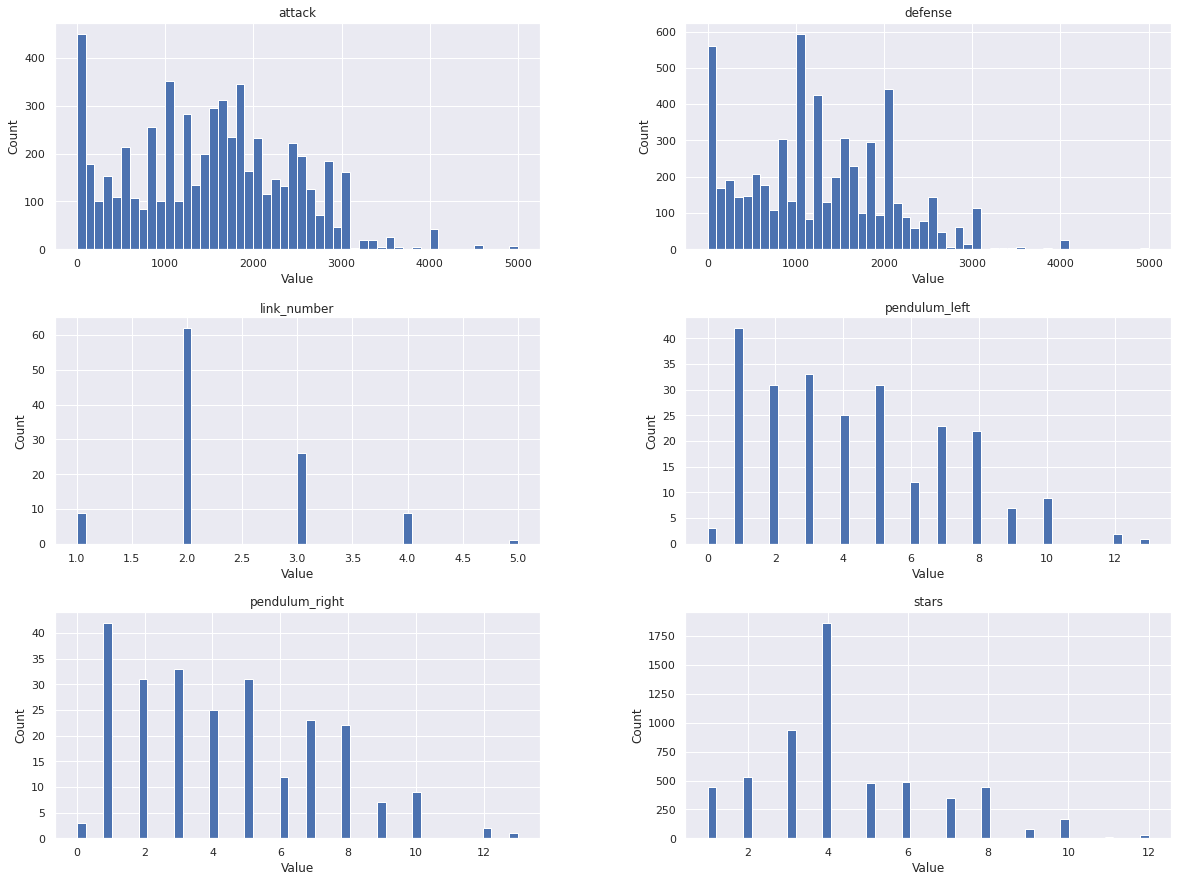

In [90]:
#Histograms are supposed to show the distribution of a numerical variable

#Lecture notes from last class has notes where you select .select_types then select your types
#or
#df[['num1','num2','num3']]
axes = dfConverted[['attack', 'defense', 'link_number', 'pendulum_left', 'pendulum_right', 'stars']].hist(bins=50, figsize=(20,15))

#Learned how to do the for loop for multi graph labeling here: https://stackoverflow.com/questions/69329880/how-do-i-label-the-x-y-axis-of-multiple-graphs-on-a-single-graph/69329975#69329975
for ax in axes[0]:
  ax.set_xlabel('Value')
  ax.set_ylabel('Count')
for ax in axes[1]:
  ax.set_xlabel('Value')
  ax.set_ylabel('Count')
for ax in axes[2]:
  ax.set_xlabel('Value')
  ax.set_ylabel('Count')
plt.show()

Interesting Items of Note:
* Most monsters have btwn 0 and 2000 attack. There are a couple peaks between 1500 and 2000 due to an overlap between monsters with 1-4 stars with high attack and monsters with 5-6 stars and low attack
* Defense's 3 biggest spikes are at 0, 1000, and 2000. This may just be a general preferance of Konamis

In [91]:
for column in dfConverted:
  print(dfConverted[column].drop_duplicates())
  print("num rows = ", dfConverted[column].drop_duplicates().count())

0                  3-Hump Lacooda
1        30,000-Year White Turtle
2       4-Starred Ladybug of Doom
3                  7 Colored Fish
4                8-Claws Scorpion
                  ...            
5944             ZW - Phoenix Bow
5945           ZW - Sleipnir Mail
5946         ZW - Tornado Bringer
5947         ZW - Ultimate Shield
5948           ZW - Unicorn Spear
Name: name, Length: 5949, dtype: string
num rows =  5949
0        500
1       1250
2        800
3       1800
4        300
        ... 
4729    2650
4757      -3
5337      -4
5498    4400
5900    3450
Name: attack, Length: 82, dtype: Int64
num rows =  82
0        EARTH
1        WATER
2         WIND
4         DARK
7        LIGHT
8         FIRE
2568    DIVINE
Name: attribute, dtype: string
num rows =  7
0       1500
1       2100
2       1200
3        800
4        200
        ... 
4757      -3
5050    4800
5081    2030
5337      -4
5541    3850
Name: defense, Length: 76, dtype: Int64
num rows =  75
0    False
9     True
Na

Interesting things to note:


*   Of the 5948 monsters in the yugioh card game, 5867 monsters have attack point values similar to any other monster meaning there are 82 unique attack point values.
*   There are 5832 rows of unique text. Meaning, There are 118 cards that have the same body of text as another card
*   There are 25 types of monsters and 7 attributes
*   



#5 Number Summary
The following are the 5 number summaries of the numerical columns. Note: "number" is excluded as passcodes serve no real purpose in the card game.

In [92]:
dfConverted.attack.describe()

count    5949.000000
mean     1469.063876
std       918.397229
min        -4.000000
25%       800.000000
50%      1500.000000
75%      2100.000000
max      5000.000000
Name: attack, dtype: float64

In [93]:
dfConverted.defense.describe()

count    5842.000000
mean     1220.311366
std       823.900396
min        -4.000000
25%       600.000000
50%      1200.000000
75%      1800.000000
max      5000.000000
Name: defense, dtype: float64

Interesting things to note:
* Both the mean and median of attack is higher than the mean and median of defense. Further emphasizing that Konami has a preferance towards higher attack values

* Defensive values tend to deviate less than attack values

In [94]:
dfConverted.link_number.describe()

count    107.000000
mean       2.355140
std        0.792087
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: link_number, dtype: float64

Interesting things to note:
* The 25th and 50th percentile is the exact same number. This emphasizes Konami's preferance for link 2 summons. Which makes sense. Link 2s are meant to be the basic link summon. Any deck should be able to facillitate a link 2 summon if they so choose. link 1s are usually banned, heavily gated to specific archetypes, or used as a mechanism to get to link 2s.

In [95]:
dfConverted.pendulum_left.describe()

count    241.000000
mean       4.385892
std        2.808552
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       13.000000
Name: pendulum_left, dtype: float64

In [96]:
dfConverted.pendulum_right.describe()

count    241.000000
mean       4.385892
std        2.808552
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       13.000000
Name: pendulum_right, dtype: float64

Interesting things to note:
* Left and right pendulums have the same 5 number summary

In [97]:
dfConverted.stars.describe()

count    5836.000000
mean        4.470699
std         2.248488
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        12.000000
Name: stars, dtype: float64

Interesting things to note:
* Since the median is 4 and the mean is greater than 4, most cards have ranks and levels higher than 4. Thus if we were to graph the stars, they would be skewed more heavily to the right.

#Various information about the categorical variables

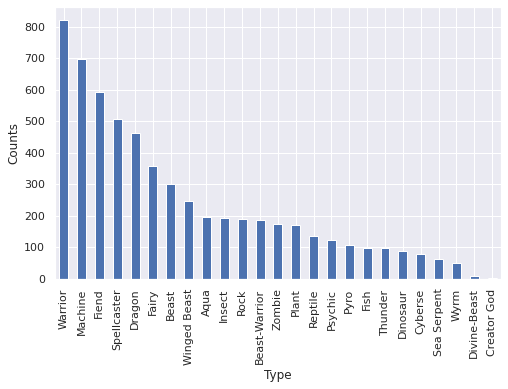

In [98]:
#['materials', 'monster_types', 'Type']] are the categorical variable that matter
dfConverted['Type'].value_counts().plot.bar(figsize=(8,5))
plt.xlabel('Type')
plt.ylabel('Counts')
plt.show()

Interesting Things to note:
* Warrior monsters are the most prevalent type of monsters. This is due to a combination of them being introduced first along side the likes of fiends, machines, and dragons and a consistent use by the main characters of the various anime series.

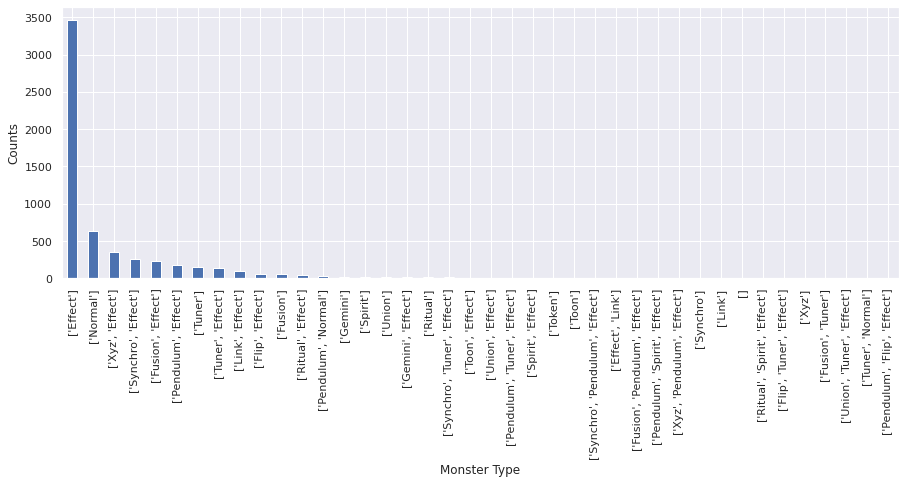

In [99]:
dfConverted['monster_types'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Monster Type')
plt.ylabel('Counts')
plt.show()

Interesting things to note:
* There are a plethora of pure Effect monsters. This is due to the combo heavy metagame yugioh has turned into over the course of its history. Yugioh cards these days need to either *be" the boss monster of the deck or be a conduit to get to your boss in the most efficient way possible.
  * However, there are quite a few normal cards as well. This is due to how yugioh was played in the slower paced, grind filled, early days. Back in the days of the Legend of Blue Eyes format, Normal cards were much more prevalent due to them having generally more attack than effect monsters.
* Its interesting that Tuners are much more prevalent than Link effect monsters. This is partly due to how recently the Link summoning mechanic came out.
* Ritual is the least prevalent summoning mechanic.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


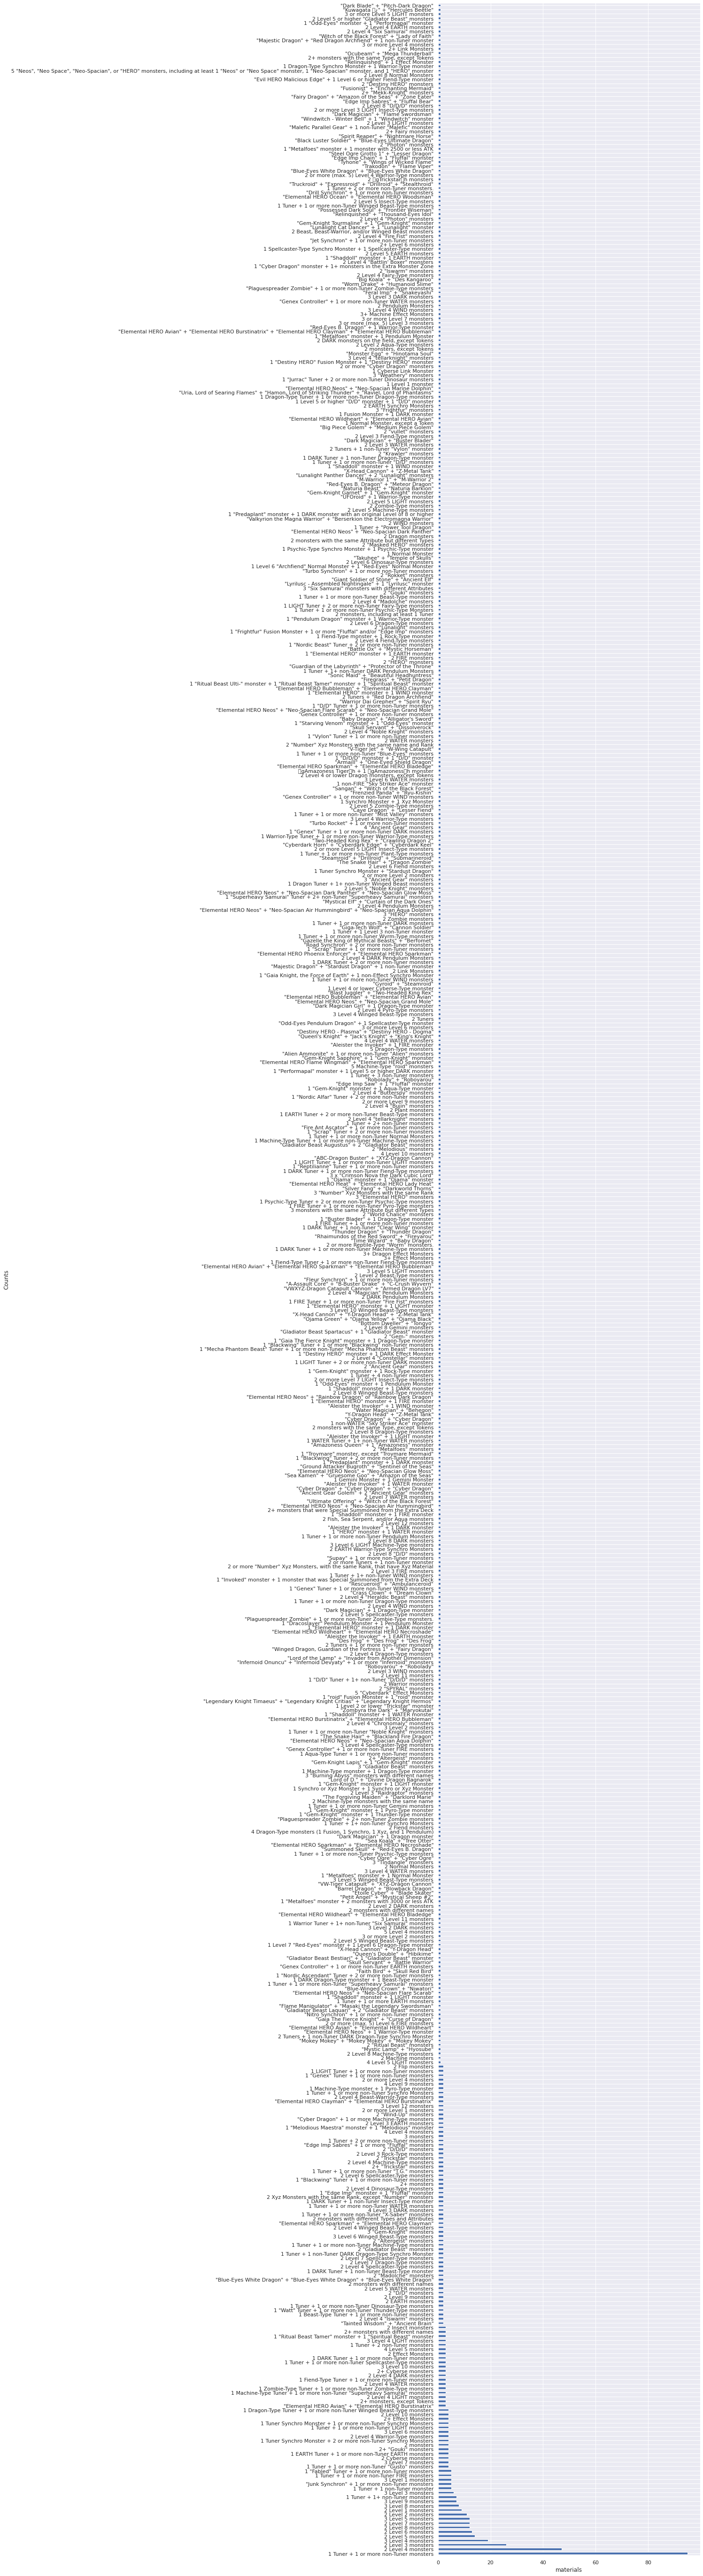

In [100]:
dfConverted['materials'].value_counts().plot.barh(figsize=(10,100))
plt.xlabel('materials')
plt.ylabel('Counts')
plt.show()

Interesting things to note:
* The materials of "1 tuner + 1 or more non-Tuner monsters" seem to be the most prevalent. This is due to that condition being put on almost every generic synchro monster
* matererials for # level # monsters are much more prevalent than everything that isnt the generic synchro materials. This is because those conditions are the xyz summoning mechanic's entire schtick.

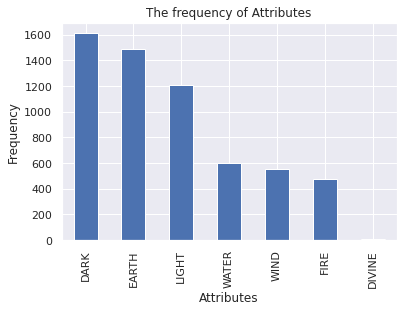

In [101]:
import seaborn as sns
#heatmaps are really good when you have an x&y (pair of categorical variables). if you dont, its not that good
#Pie graphs are actually the worst
dfConverted['attribute'].value_counts().plot(kind='bar')
plt.title('The frequency of Attributes')
plt.xlabel('Attributes')
plt.ylabel('Frequency')
plt.show()

In [102]:
print(dfConverted.loc[dfConverted['attribute'] == 'DIVINE'])

                                            name  ...  TCG_Dates
2568               Holactie the Creator of Light  ...       2002
3880                       Obelisk the Tormentor  ...       2015
3881            Obelisk the Tormentor (original)  ...       2010
4756                       Slifer the Sky Dragon  ...       2005
4757            Slifer the Sky Dragon (original)  ...       2004
5280                     The Winged Dragon of Ra  ...       2002
5281          The Winged Dragon of Ra (original)  ...       2011
5282  The Winged Dragon of Ra - Immortal Phoenix  ...       2004
5283       The Winged Dragon of Ra - Sphere Mode  ...       2016
5337                                       Token  ...       1900

[10 rows x 26 columns]


Interesting things to note:
*  Dark attribute monsters are the most prevalent type of monsters in the game today. 
*  The divine type is only reserved for the 3 egyptian god cards, the 3 original copies of the cards, the card signifying the combination of the gods, the winged dragon of ra's "egg", the revived form of the winged dragon of ra, and apparently tokens

In [103]:
dfConverted.groupby(['attribute']).describe()[['attack']]

attack                            ...                        
            count         mean          std  ...     50%     75%     max
attribute                                    ...                        
DARK       1614.0  1511.120198   980.111840  ...  1500.0  2300.0  5000.0
DIVINE       10.0  1198.300000  1933.356784  ...    -2.0  2999.5  4000.0
EARTH      1491.0  1359.639168   847.066443  ...  1400.0  1900.0  5000.0
FIRE        472.0  1563.122881   866.787917  ...  1600.0  2200.0  3800.0
LIGHT      1212.0  1576.132013   997.949724  ...  1600.0  2400.0  5000.0
WATER       598.0  1400.996656   795.359883  ...  1475.0  1900.0  3300.0
WIND        552.0  1404.793478   833.183195  ...  1475.0  2000.0  4000.0

[7 rows x 8 columns]

Interesting things to note:
*  EARTH monsters have the lowest average attack, first quartile, median, and third quartile. This is due to how in the early days of yugioh, EARTH monsters focused more on using attribute gated equip spells to get stronger along with various other spells.
* Despite its low count, FIRE monsters have quite the respectable attack spread
* Not all the attributes max out at 5000. This may be due to LIGHT, DARK, and EARTH monsters tend to belong to the main protagonists and main antagonists of the series like Kaiba, Yugi, and Joey respectively.

In [104]:
dfConverted.groupby(['attribute']).describe()[['defense']]

defense                                                              
            count         mean          std  min    25%     50%     75%     max
attribute                                                                      
DARK       1585.0  1199.846057   872.570151 -2.0  500.0  1200.0  1800.0  5000.0
DIVINE       10.0  1198.300000  1933.356784 -4.0   -2.0    -2.0  2999.5  4000.0
EARTH      1465.0  1198.300341   790.218423 -2.0  600.0  1200.0  1800.0  5000.0
FIRE        463.0  1144.587473   806.843360 -2.0  400.0  1200.0  1800.0  3600.0
LIGHT      1181.0  1308.147333   881.046644 -2.0  700.0  1200.0  2000.0  5000.0
WATER       592.0  1233.949324   725.487747 -2.0  800.0  1200.0  1800.0  3000.0
WIND        546.0  1198.619048   703.576795 -2.0  700.0  1200.0  1600.0  4000.0

Interesting items of note:
* The overall mean of defense is higher than that of attack. despite the 1st, 2nd, and 3rd quartile being generally higher in attack

#Missing Values

In [105]:
dfConverted.isna().sum()

name                     0
attack                   0
attribute                0
defense                107
has_materials            0
has_name_condition       0
is_extra_deck            0
is_fusion                0
is_link                  0
is_pendulum              0
is_synchro               0
is_xyz                   0
link_markers          5842
link_number           5842
materials             4919
monster_types            0
name_condition        5943
number                  22
pendulum_left         5708
pendulum_right        5708
pendulum_text         5709
releases                 0
Type                     0
stars                  113
text                    61
TCG_Dates                0
dtype: int64

#####Interesting Items of Note:


*   5842 monsters have no link markers nor link numbers
*   There are 107 monsters without a defense state yet every monster has some form of attack stat
*   There are only 6 monsters with naming conditions



In [106]:
#Which monsters have naming conditions?
print(dfConverted.loc[dfConverted['has_name_condition'] == True])

                            name  ...  TCG_Dates
1013           Cyber Harpie Lady  ...       2005
2471               Harpie Lady 1  ...       2002
2472               Harpie Lady 2  ...       2004
2473               Harpie Lady 3  ...       2004
3700  Neo-Spacian Marine Dolphin  ...       2007
3701    Neo-Spacian Twinkle Moss  ...       2007

[6 rows x 26 columns]


In [107]:
#Which monsters have no stars?
Link_Monsters = dfConverted.loc[dfConverted['is_link'] == True]
print(Link_Monsters[['name', 'defense', 'stars']])
noStars = dfConverted[dfConverted['stars'].isna()]
noStars.loc[noStars['is_link'] == False]


                               name  defense  stars
54                 Akashic Magician     <NA>   <NA>
62    Aleister the Meltdown Invoker     <NA>   <NA>
113              Altergeist Hexstia     <NA>   <NA>
114              Altergeist Kidolga     <NA>   <NA>
120         Altergeist Primebanshee     <NA>   <NA>
...                             ...      ...    ...
5741         Wind-Up Zenmaintenance     <NA>   <NA>
5823             X-Krawler Neurogos     <NA>   <NA>
5824             X-Krawler Qualiark     <NA>   <NA>
5825           X-Krawler Synaphysis     <NA>   <NA>
5899                Zefra Metaltron     <NA>   <NA>

[107 rows x 3 columns]


,name,attack,attribute,defense,has_materials,has_name_condition,is_extra_deck,is_fusion,is_link,is_pendulum,is_synchro,is_xyz,link_markers,link_number,materials,monster_types,name_condition,number,pendulum_left,pendulum_right,pendulum_text,releases,Type,stars,text,TCG_Dates
3870,Number F0: Utopic Future,0,LIGHT,0,True,False,True,False,False,False,False,True,<NA>,<NA>,"2 Xyz Monsters with the same Rank, except ""Num...","['Xyz', 'Effect']",<NA>,65305468,<NA>,<NA>,<NA>,{'OCG': {'The New Challengers': {'Japanese': {...,Warrior,<NA>,(This card's original Rank is always treated a...,2014
3871,Number F0: Utopic Future - Future Slash,0,LIGHT,0,True,False,True,False,False,False,False,True,<NA>,<NA>,"2 Xyz Monsters with the same Rank, except ""Num...","['Xyz', 'Effect']",<NA>,43490025,<NA>,<NA>,<NA>,{'OCG': {'The Valuable Book 19': {'Japanese': ...,Warrior,<NA>,(This card's original Rank is always treated a...,2015
3872,Number S0: Utopic ZEXAL,-2,LIGHT,-2,True,False,True,False,False,False,False,True,<NA>,<NA>,"3 ""Number"" Xyz Monsters with the same Rank","['Xyz', 'Effect']",<NA>,52653092,<NA>,<NA>,<NA>,{'OCG': {'20th Legendary Collection': {'Japane...,Warrior,<NA>,(This card's original Rank is always treated a...,1900
4089,Phantasmal Lord Ultimitl Bishbaalkin,0,DARK,0,False,False,True,False,False,False,True,False,<NA>,<NA>,<NA>,"['Synchro', 'Effect']",<NA>,90884403,<NA>,<NA>,<NA>,{'OCG': {'Premium Pack 18': {'Japanese': {'set...,Dragon,<NA>,(This card's original Level is always treated ...,2017
5337,Token,-4,DIVINE,-4,False,False,False,False,False,False,False,False,<NA>,<NA>,<NA>,['Token'],<NA>,<NA>,<NA>,<NA>,<NA>,{'OCG': {'Promotion Pack 2017': {'Japanese': {...,Creator God,<NA>,This card can be used as any Token.,1900
5508,Ultimaya Tzolkin,0,DARK,0,False,False,True,False,False,False,True,False,<NA>,<NA>,<NA>,"['Synchro', 'Effect']",<NA>,1686814,<NA>,<NA>,<NA>,{'OCG': {'V Jump February 2015 promotional car...,Dragon,<NA>,(This card's original Level is always treated ...,2006


* All the monsters with no defensive values are link monsters because link monsters cannot be set to defense and cards that manipulate a card's defensive profile have no effect on link monsters.
* 107 of the 113 cards that dont have stars are link monsters which makes sense as their summoning mechanic doesnt require stars.
  * 3 of the 113 are from the utopic future sub-archetype that are known for being rank 0(or question marks)
  * Tokens levels are determined by whatever card creates them.
  * 	"Phantasmal Lord Ultimitl Bishbaalkin" and "Ultimaya Tzolkin" are special synchro monsters that are treated as level 12 once they hit the field, but until then dont really have a level.

#Other Interesting Relationships

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


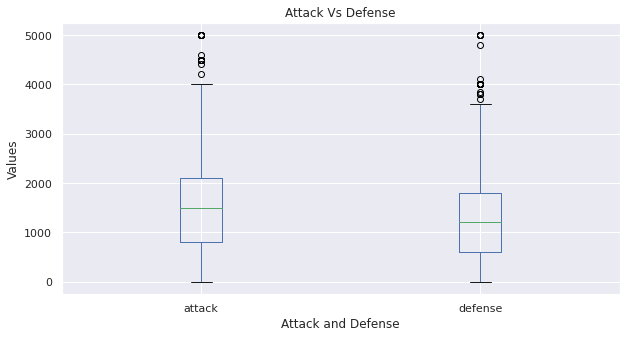

In [108]:
#dfConverted.attack = dfConverted.attack.astype(float)
#dfConverted.defense = dfConverted.defense.astype(float)

dfConverted[['attack','defense']].plot.box(figsize=(10,5))
plt.title('Attack Vs Defense')
plt.xlabel('Attack and Defense')
plt.ylabel('Values')
plt.show()

In general: attack are higher than defense

Text(0.5, 1.0, 'Attack vs Defense')

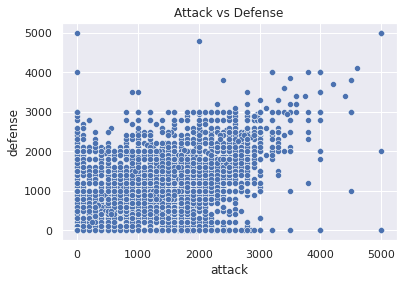

In [109]:
#Scatter Plot of Attack vs Defense
sns.scatterplot(data=dfConverted,x="attack",y="defense").set_title("Attack vs Defense")

Interesting things to note:
*   There is a positive relationship btwn attack and defense
*   Themost amount of outliers lie at 0 attack, 2000 attack, 0 defense, and 2000 defense. In yugioh, there are some unwritten rules (https://yugioh.fandom.com/wiki/Level_4_ATK_and_DEF_Rules) for level 4 monsters to have 2000+ attack they need to have a negative effect and if a level 4 or lower monster has 0 atk or def, they should have a very powerful effect. So those outliers likely due to Konami following that rule over the course of yugioh's lifetime.


Text(0.5, 1.0, 'Attack vs stars')

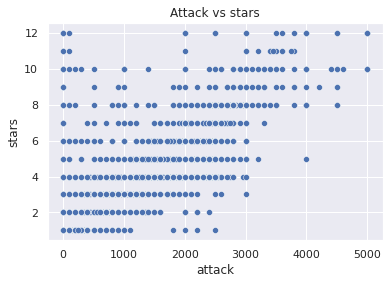

In [110]:
#Scatter Plot of Attack vs Defense
sns.scatterplot(data=dfConverted,x="attack",y="stars").set_title("Attack vs stars")

Interesting things to note:
* Looks really similat to the attack vs defense scatter plot.

Text(0.5, 1.0, 'Defense vs Stars')

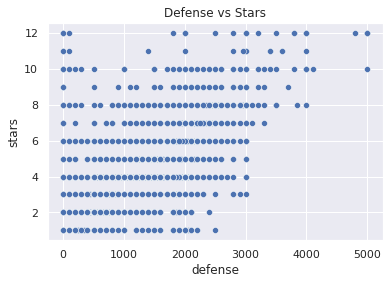

In [111]:
#Scatter Plot of Attack vs Defense
sns.scatterplot(data=dfConverted,y="stars",x="defense").set_title("Defense vs Stars")

Interesting things to note:
* The defense vs stars graph seems to be wider than the attack vs stars graph. I assume this is due to Konami focusing more on following self-imposed attack value guidelines since the only way to lower your opponent's life points is to burn them or attack using another monster.

Text(0.5, 1.0, 'Attack vs Link Number')

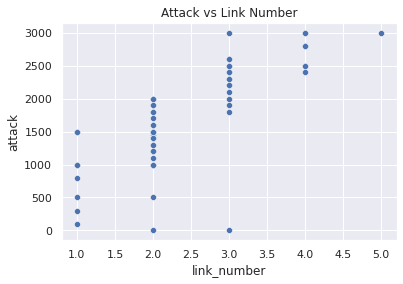

In [112]:
#Scatter Plot of Attack vs Defense
sns.scatterplot(data=dfConverted,y="attack",x="link_number").set_title("Attack vs Link Number")

Interesting things to note:
* Each of these graphs look like checkmarks. They start out with a bunch of special cards at the beginning then follow a more expected rising trend

## Boxplots of categorical vs numeric data

Text(0.5, 1.0, 'Attribute vs Defense')

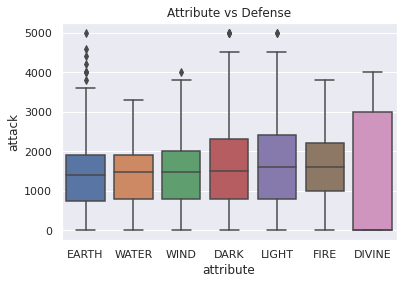

In [113]:
#Box Plot of Attribute vs attack
sns.boxplot(data=dfConverted,x="attribute",y="attack").set_title("Attribute vs Defense")

Text(0.5, 1.0, 'Attribute vs Defense')

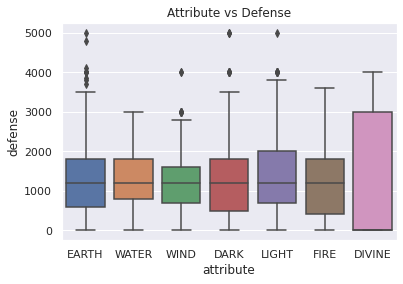

In [114]:
#Box Plot of Attribute vs attack
sns.boxplot(data=dfConverted,x="attribute",y="defense").set_title("Attribute vs Defense")

Interesting things to note:
* Earth has significantly more outliers than any of the other attributes
* The light box is slightly higer than any of the other boxes
* The wind attribute seems to be the least spread
* There are no outliers in the water attribute

Text(0.5, 1.0, 'Type vs Attack')

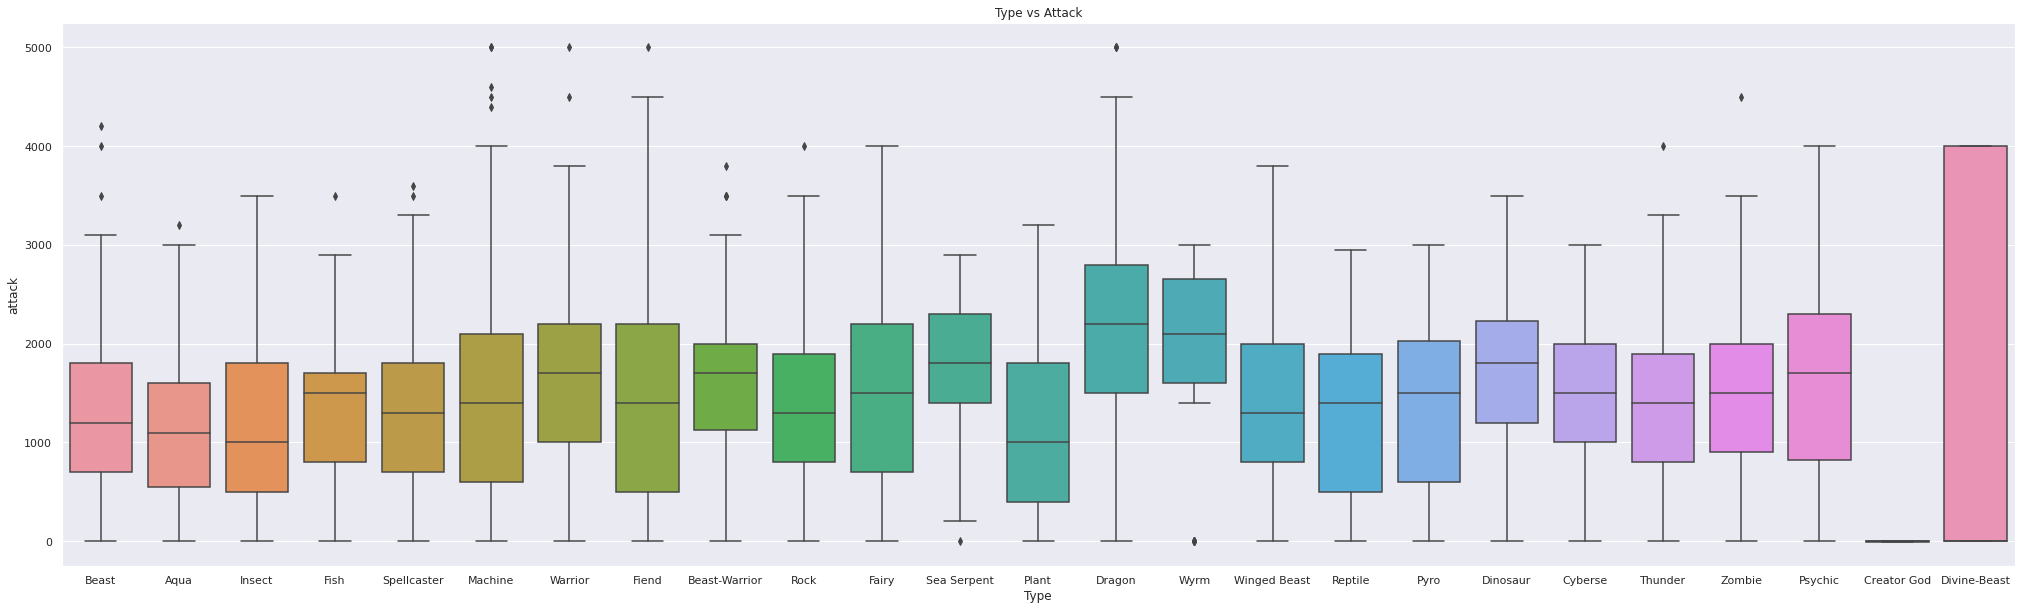

In [115]:
#Box Plot of Attribute vs attack
sns.set(rc={'figure.figsize':(35,10)})
sns.boxplot(data=dfConverted,x="Type",y="attack").set_title("Type vs Attack")


Interesting things to note:
* Insect, plants, winged beast, reptile, pyro, dinosaur, cyberse, fairy, and psychic have no outliers
* (Ignoring divine beast (explained later)) fiends seem to have the most spread. This is due to the fiends being one of the earliest Types. In the eary days of yugioh there was no rhyme nor reason to the attack values of monsters. Most cards were made without the thought of them being competatively viable.


### One thing I noticed with the categorical variables:
* The divine-beast Type/Divine attribute cards are such a small set, they can be largely ignored

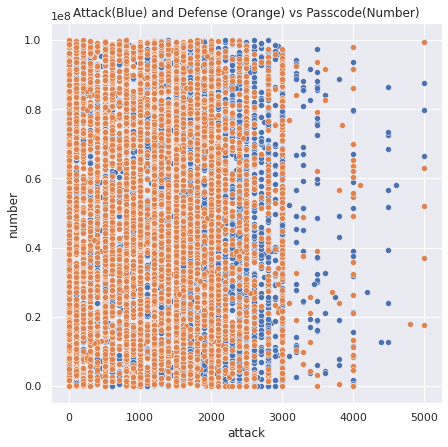

In [116]:
sns.set(rc={'figure.figsize':(7,7)})
sns.scatterplot(data=dfConverted,x="attack",y="number").set_title("Attack(Blue) and Defense (Orange) vs Passcode(Number)")
sns.scatterplot(data=dfConverted,x="defense",y="number")

Text(0.5, 1.0, 'stars vs Passcode(Number)')

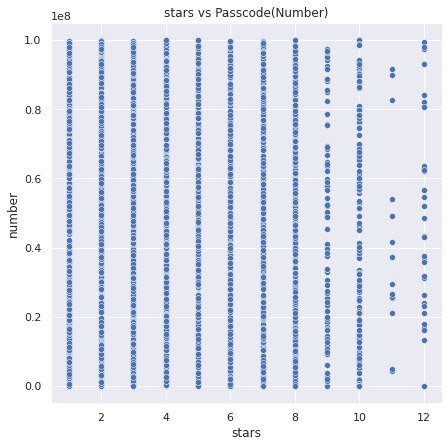

In [117]:
sns.scatterplot(data=dfConverted,x="stars",y="number").set_title("stars vs Passcode(Number)")

Text(0.5, 0, 'Pendulum Scales')

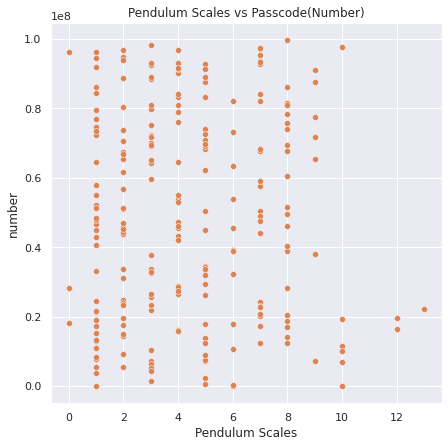

In [118]:
sns.scatterplot(data=dfConverted,x="pendulum_left",y="number").set_title("Pendulum Scales vs Passcode(Number)")
sns.scatterplot(data=dfConverted,x="pendulum_right",y="number")
plt.xlabel("Pendulum Scales")

Text(0.5, 1.0, 'Type vs number')

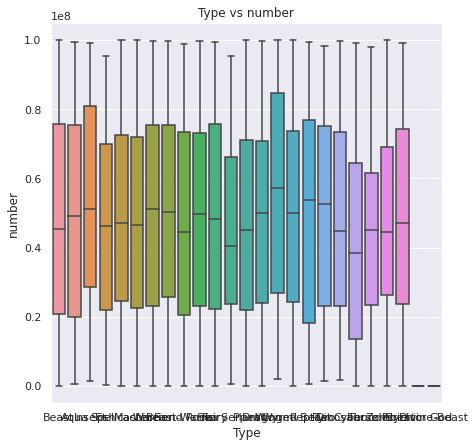

In [119]:
sns.boxplot(data=dfConverted,x="Type",y="number").set_title("Type vs number")

Text(0.5, 1.0, 'Attribute vs Number')

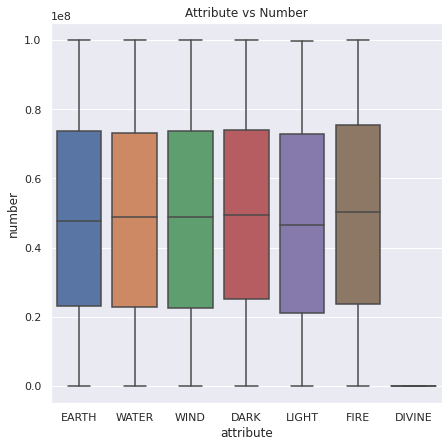

In [120]:
sns.boxplot(data=dfConverted,x="attribute",y="number").set_title("Attribute vs Number")

Interesting items to note:
* there is no correlation nor anything interesting to note btwn "number" and any other data

#Overall takeaways from what I have observed throughout this analysis
* Things i've noticed
  * This dataset is... HUGE
  * there are thousands of rows
  * The "releases" category contained the card's release in every single region. However for the most part, they are all dropped within the same year (give or take a few for the january or december drops). Therefore, I'll focus more on the years the cards were dropped and wont change that unless its absolutely nessessary. 
* Things I would need to do prior to modeling: 
  * The following columns serve no real purpose regarding my buisness question
    * Number
      * has nothing to contribute towards my buisness question
    * naming_condition*
      * Changing the name on the field has no bearing on the monster's strength
    * text*
    * pendulumn_text*
  * The following Categorical variables will need dummy variables (one hot encoding):
    * attribute
    * Type
    * monster_types
    * materials
  * depending on what kind of information I want to gain out of my regression, I may want to clean up monster_types and materials. Break those up into various columns.

*If I learn about another method of gathering data from text that make these columns viable towards my busness question I may need them again, but at the moment, they offer the regression analysis I will be doing nothing.